In [1]:
import sys
sys.path.append('../')

import numpy as np

from mlfs.supervised.linear_regression import LassoRegression
from mlfs.utils.metrics import rmse
from mlfs.utils.validation import train_test_split, KFold

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.datasets import load_boston

from matplotlib import pyplot as plt
%matplotlib inline

### Demo with boston data set

In [2]:
# load data
boston = load_boston()
X = boston.data
y = boston.target

### Define Test

In [3]:
def test(model, solver=None):
    alpha = [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
    train_rmse = []
    test_rmse = []
    weights = []
    
    kf = KFold(n_splits=5)
    
    for a in alpha:
        train_rmse_kf = []
        test_rmse_kf = []
        for train_idx, test_idx in kf.split(X, y):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]
            
            if solver:
                regressor = model(alpha=a,solver=solver)
            else:
                regressor = model(alpha=a)
            regressor.fit(X_train, y_train)

            y_train_pred = regressor.predict(X_train)
            y_test_pred = regressor.predict(X_test)

            train_rmse_kf.append(rmse(y_train, y_train_pred))
            test_rmse_kf.append(rmse(y_test, y_test_pred))
            
        train_rmse.append(np.mean(train_rmse_kf))
        test_rmse.append(np.mean(test_rmse_kf))

        if solver:
            regressor = model(alpha=a,solver=solver)
        else:
            regressor = model(alpha=a)
        regressor.fit(X, y)
        if model==Lasso:
            weights.append(np.insert(regressor.coef_, 0, regressor.intercept_))
        else:
            weights.append(regressor.w)

    weights = np.array(weights)
    
    # ===== Plot =====
    
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,18))
    cmap = plt.get_cmap("tab10")
    ax1.set_xscale('log')
    ax2.set_xscale('log')
    ax3.set_xscale('log')
    
    # draw rmse
    ax1.set_title('Root squared mean error', fontsize=14)
    ax1.set_xlabel('alpha (log scale)', fontsize=12)
    ax1.set_ylabel('root squared mean error', fontsize=12)
    
    _ = ax1.plot(alpha, train_rmse, color='skyblue', linestyle = '-')
    _ = ax1.plot(alpha, test_rmse, color='orange', linestyle = '-')
    
    ax2.set_title('Intercept', fontsize=14)
    ax2.set_xlabel('alpha (log scale)', fontsize=12)
    ax2.set_ylabel('Intercept', fontsize=12)

    _ = ax2.plot(alpha, weights[:,0], 'b-')
    
    ax3.set_title('Coefficients', fontsize=14)
    ax3.set_xlabel('alpha (log scale)', fontsize=12)
    ax3.set_ylabel('Coefficients', fontsize=12)

    for i in range(weights.shape[1]):
        if i != 0:
            _ = ax3.plot(alpha, weights[:,i], color=cmap(i), linestyle = '-')

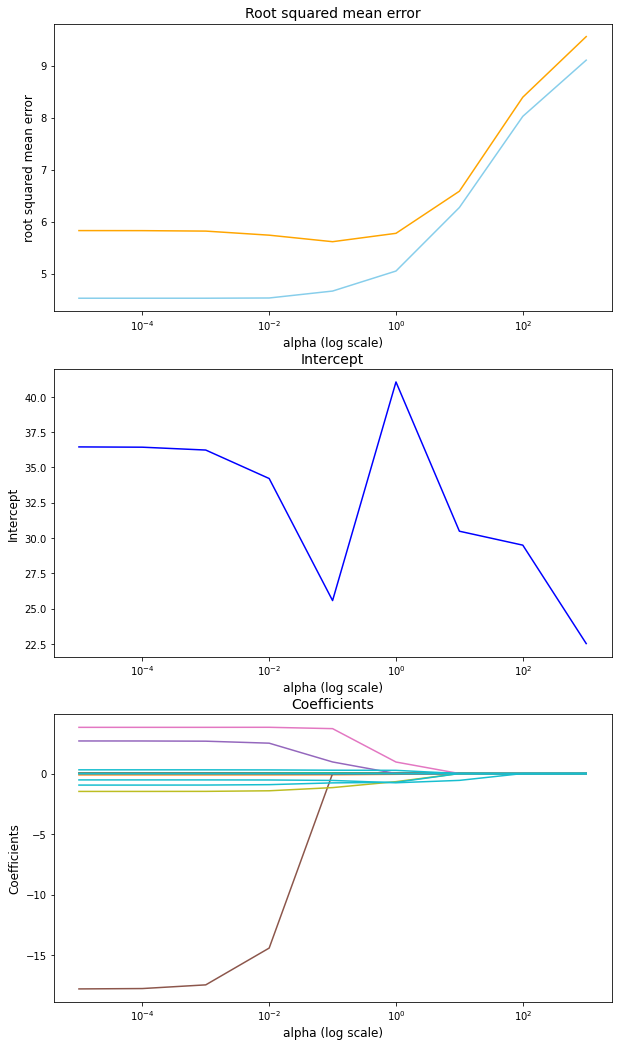

In [4]:
# Sklearn's Lasso
test(Lasso)

Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.
Converged.


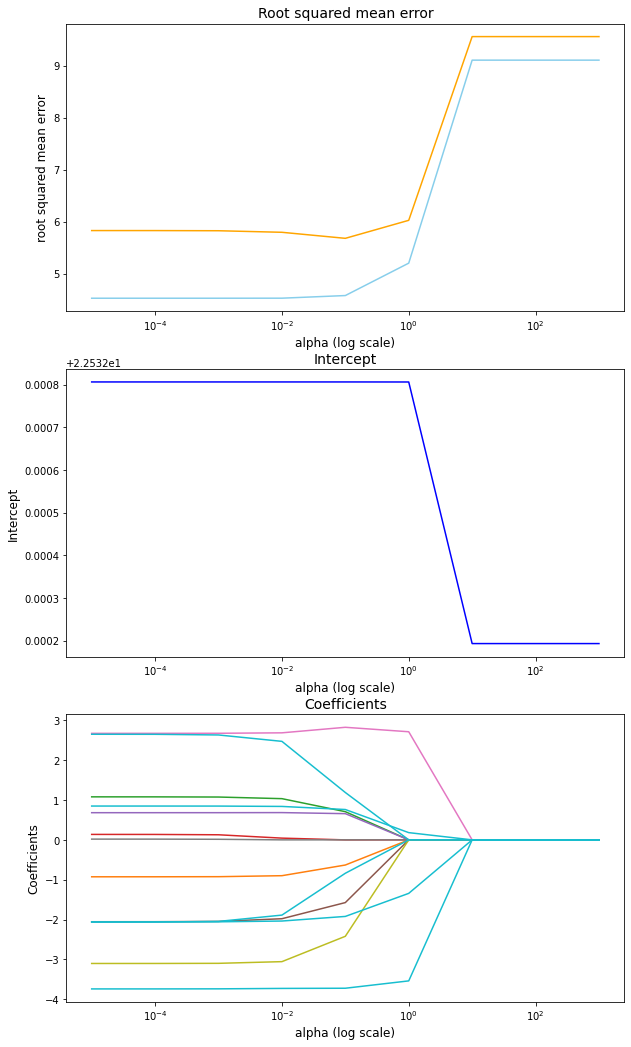

In [5]:
# Our own implementation of Lasso
test(LassoRegression)